# Rossmann Dataset Analysis DSR Mini-Competition

# Data Visualisation

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## 1. Load, merge and describe the original data

In [64]:
train = pd.read_csv("../../data/train.csv")
store = pd.read_csv("../../data/store.csv")

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
merged_train_store = pd.merge(store, train, on='Store', how='left')

In [66]:
merged_train_store.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,618473.0,558.105623,321.885545,1.0,279.0,558.0,837.0,1115.0
CompetitionDistance,616838.0,5412.023773,7673.525463,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,422043.0,7.224053,3.210645,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,422043.0,2008.673521,6.140044,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,618473.0,0.509041,0.499919,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,314828.0,23.515643,14.119306,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,314828.0,2011.760123,1.670273,2009.0,2011.0,2012.0,2013.0,2015.0
DayOfWeek,600036.0,3.994974,1.997527,1.0,2.0,4.0,6.0,7.0
Sales,600028.0,5667.469356,3809.436273,0.0,3639.0,5625.0,7713.0,38037.0
Customers,599957.0,628.818459,463.765657,0.0,397.0,604.0,833.0,7388.0


## 2. Missing Values

In [67]:
print(f"Merged data frame contains {sum(merged_train_store.isnull().any())} columns.")

Merged data frame contains 13 columns.


### A heat map of the merged data set with row index (y-axis) and column names (x-axis) showing missing values as value of 1 and zero for any value in the column.

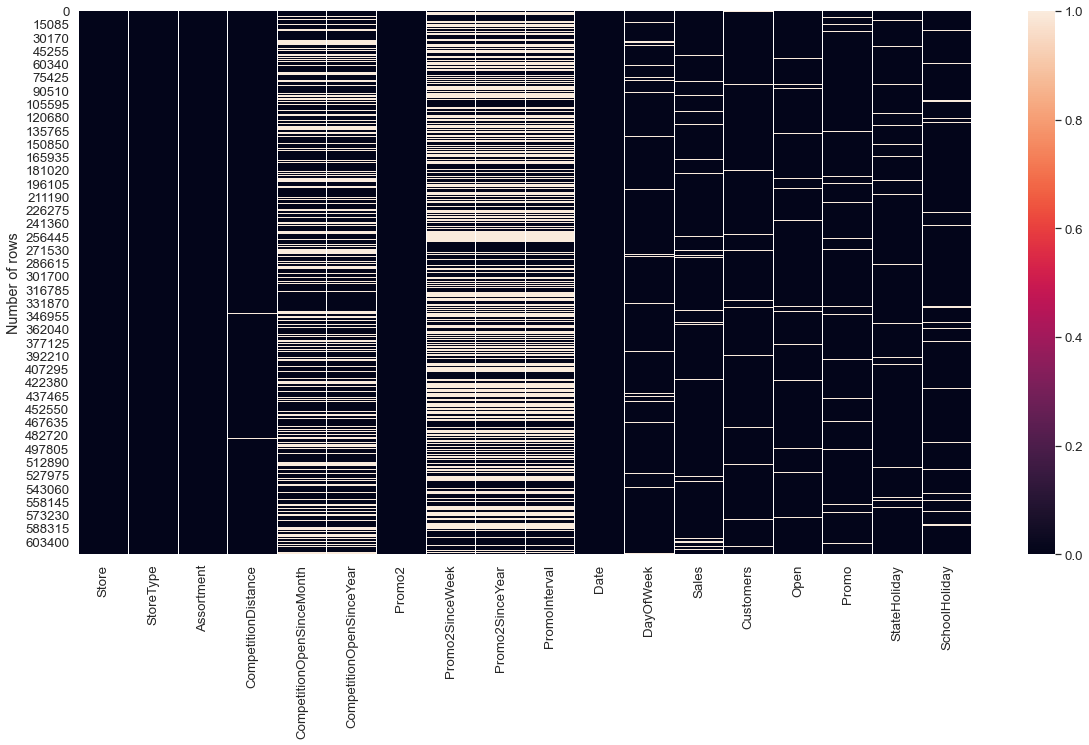

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(merged_train_store.isnull())
plt.ylabel('Number of rows');

## 3. Outliers
For indicating outliers we use boxplots which are a standrdadized way of how to display distribution of data based on five numbers: 
- minimum Q1 -1.5*IQR
- first quartile Q1
- median Q2
- third quartile Q3
- maximum Q3 + 1.5*IQR

The space between the different parts of the box indicate the degree of dispersion and skewness in the data, and show outliers. In a boxplot, an outlier is defined as a point outside the minimum or maximum.
![title](boxplot.png)

[Source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

___

### 3.1 Target feature 'Sales'¶

#### Droped missing values in 'Sales'

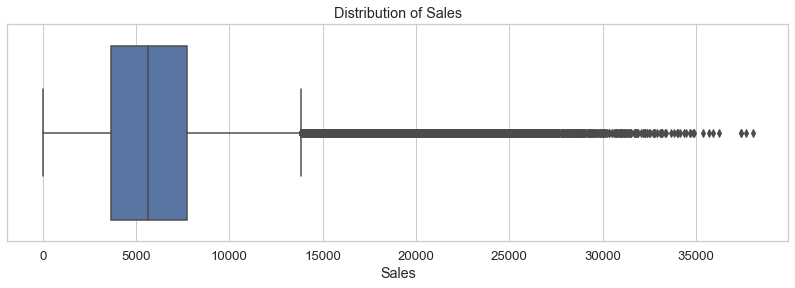

In [72]:
# Drop 'Sales' rows with missing values
nonzero_merged_Sales = merged_train_store.loc[~merged_train_store.loc[:, 'Sales'].isnull()]
plt.figure(figsize=(14, 4))
sns.boxplot(x=nonzero_merged_Sales.Sales)
plt.title('Distribution of Sales');

#### Droped missing and zero values in 'Sales'

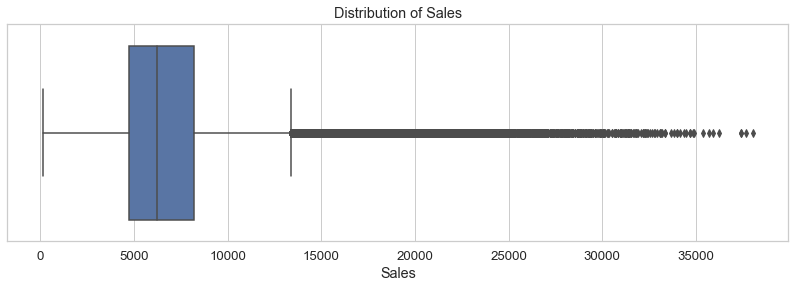

In [73]:
nonzero_sales = nonzero_merged_Sales[(nonzero_merged_Sales['Sales'] > 0)]
plt.figure(figsize=(14, 4))
sns.boxplot(x=nonzero_sales.Sales)
plt.title('Distribution of Sales');

### 'Sales' in 'StoreType' breakdown 

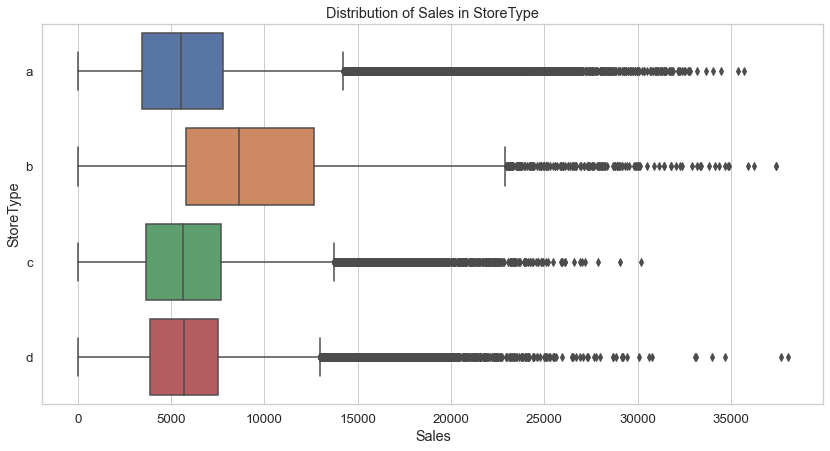

In [74]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sales', y='StoreType',
            #hue='StoreType',
            orient="h",
            data=nonzero_merged_Sales.sort_values(by = ["StoreType"]))
plt.title('Distribution of Sales in StoreType');

### 3.2 'CompetitionDistance'

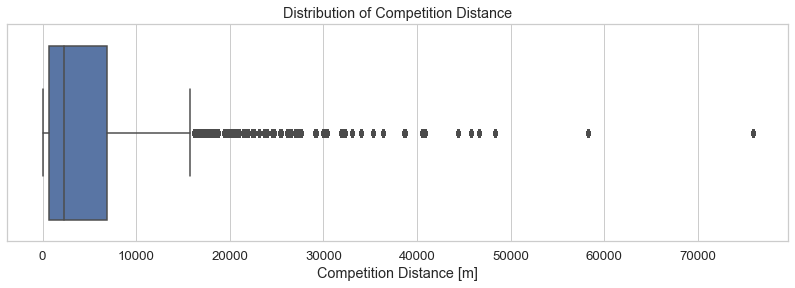

In [75]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=merged_train_store.CompetitionDistance)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance [m]');

### 'CompetitionDistance' in 'StoreType' breakdown

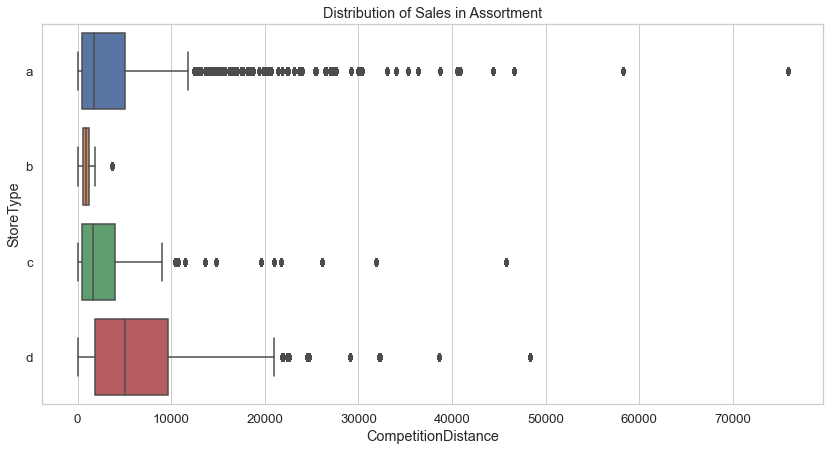

In [76]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='CompetitionDistance', y='StoreType',
            #hue='StoreType',
            orient="h",
            data=merged_train_store.sort_values(by = ["StoreType"]))
plt.title('Distribution of Sales in Assortment');

### 3.3 'CompetitionOpenSinceYear'

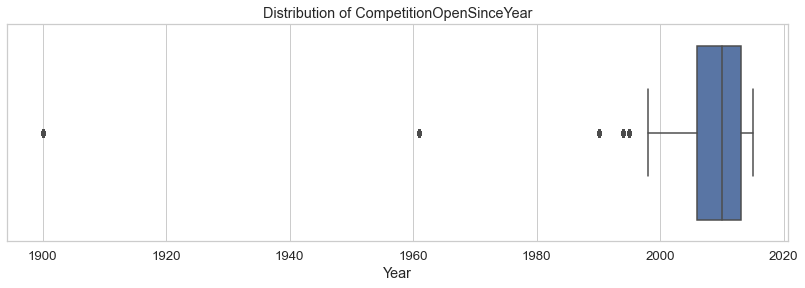

In [77]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=merged_train_store.CompetitionOpenSinceYear)
plt.title('Distribution of CompetitionOpenSinceYear')
plt.xlabel('Year');

___

## 4. 'Sales' vs 'Promo' and 'Promo2'

### 4.1 Distribution of 'Sales' with 'Promo' and 'Promo2'

#### Droped missing and zero values

In [78]:
nonzero_merged_Sales = merged_train_store.loc[~merged_train_store.loc[:, 'Sales'].isnull()]
nonzero_merged_Sales = nonzero_merged_Sales.loc[nonzero_merged_Sales.Sales > 0]

### a) Distribution of 'Sales' in 'Promo'

#### Distribution with separate Count for Promo=0 and Promo=1

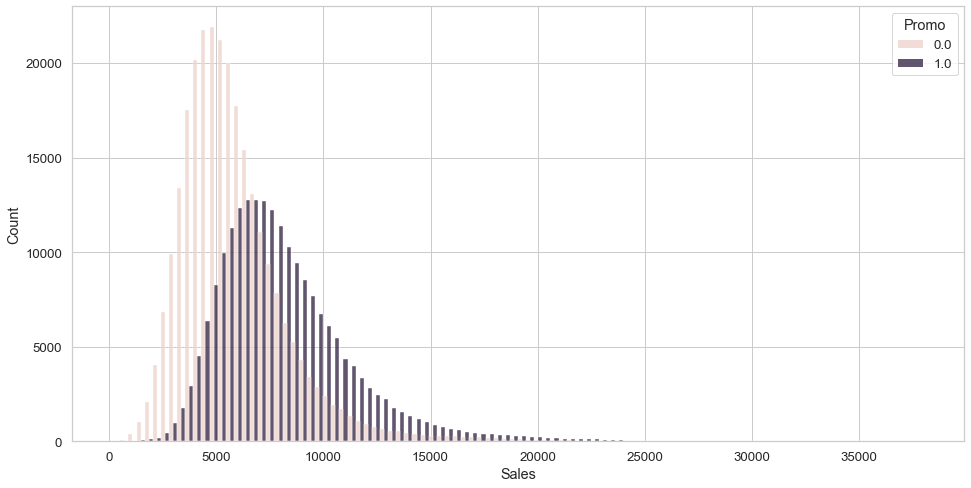

In [79]:
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales',  
            hue='Promo',
            multiple='dodge',
            bins= 100,
            data=nonzero_merged_Sales);

#### Distribution with stacked Count

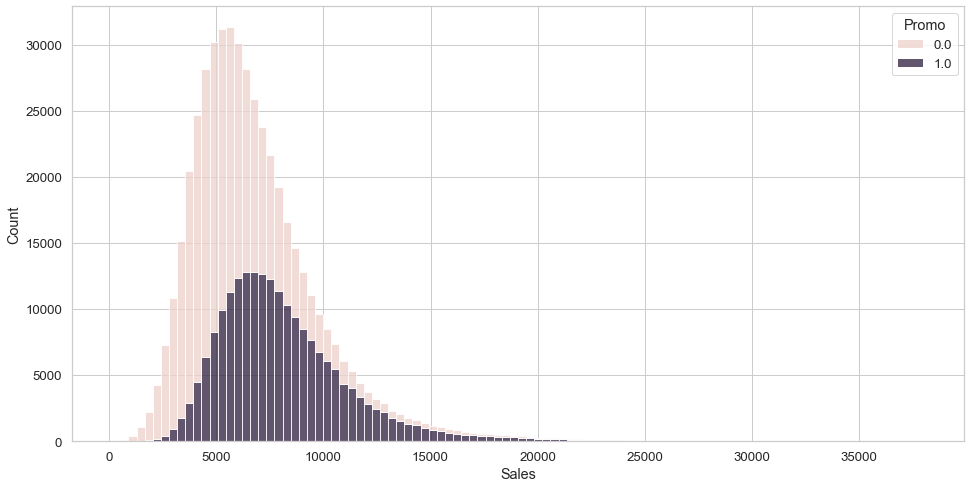

In [80]:
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales',  
            hue='Promo',
            multiple='stack',
            bins= 100,
            data=nonzero_merged_Sales);

### b) Distribution of 'Sales' depending in 'Promo2'

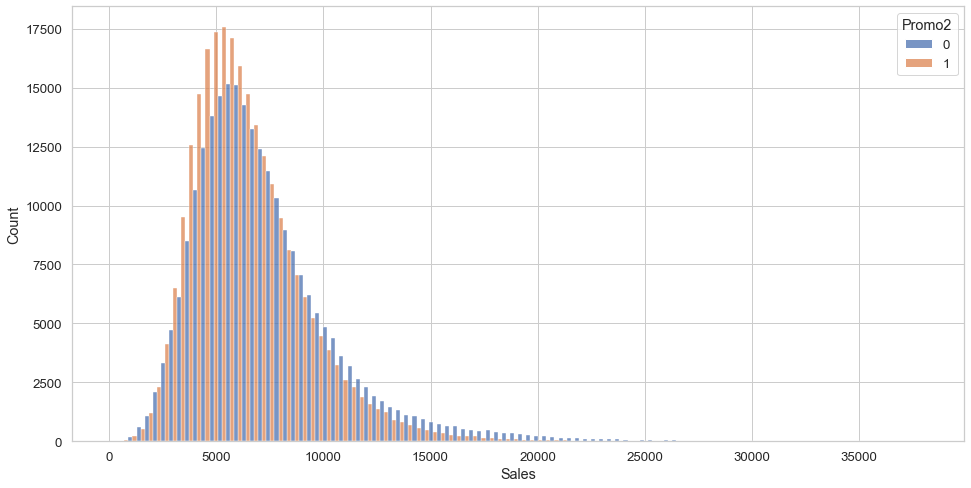

In [81]:
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales', 
            hue='Promo2',
            multiple='dodge',
            bins= 100,
            data=nonzero_merged_Sales);

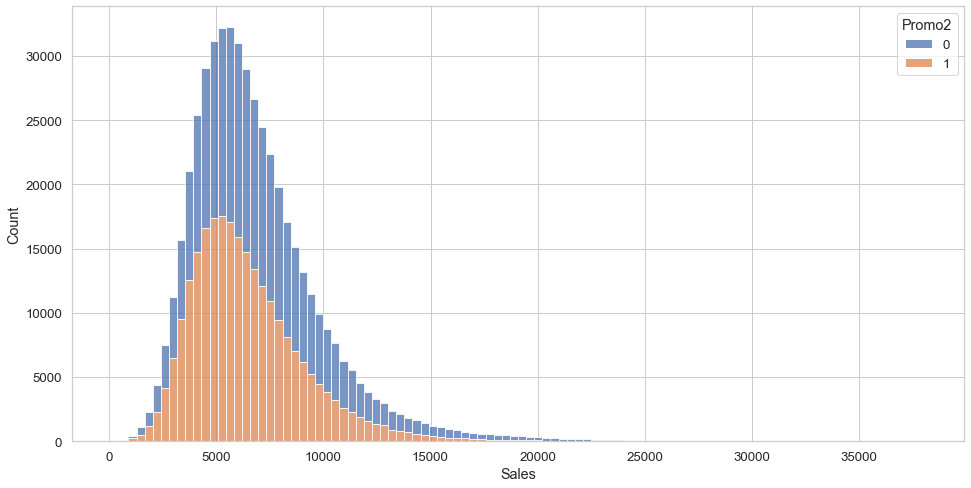

In [82]:
# Stacked bars
plt.figure(figsize=(16, 8))
sns.histplot(x='Sales', 
            hue='Promo2',
            multiple='stack',
            bins= 100,
            data=nonzero_merged_Sales);

### 4.2 Difference in 'Sales' between Stores with 'Promo' and 'Promo2'

In [83]:
# Convert Date to datetime and create a new column 'Month'
merged_train_store.Date = pd.to_datetime(merged_train_store.Date)
merged_train_store['Month'] = merged_train_store.Date.dt.month


We use `catplot()` function from seaborn library, with the option `kind='point'` to present the sales over months and weekdays. A point in chart shows the mean value of sales for a month/ weekday over all years inluded in the data set. 

#### a) Average 'Sales' in months when 'Promo' = 0 (left)  and 'Promo' = 1 (right).

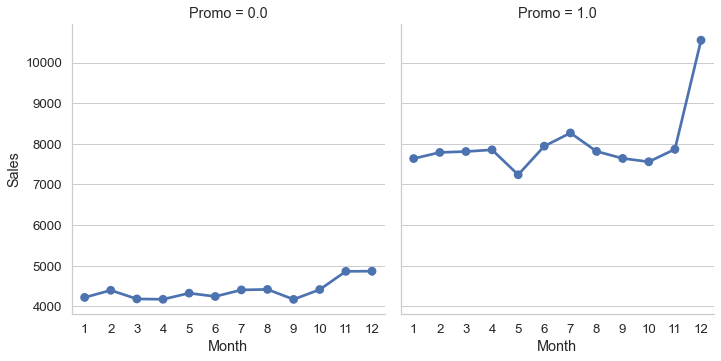

In [84]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               kind='point',
               data=merged_train_store);

#### b) Average 'Sales' in months with additional granularity of 'Promo2'. Generally Sales are higher when there is no 'Promo2' (no consecutive promotion).

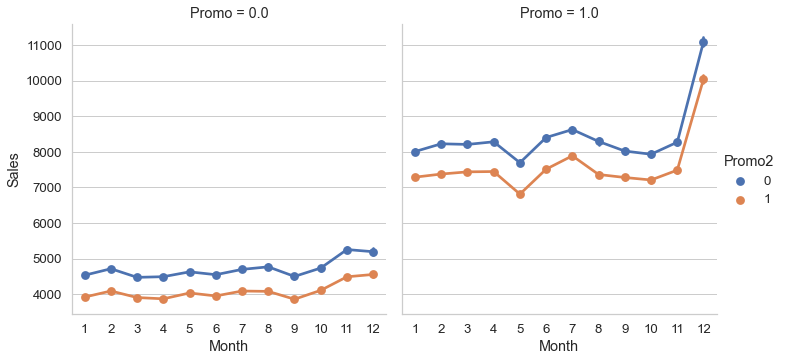

In [85]:
sns.catplot(x='Month', y='Sales',
               col='Promo',
               hue='Promo2',
               kind='point',
               data=merged_train_store)

#### c) Average 'Sales' over the weekdays.

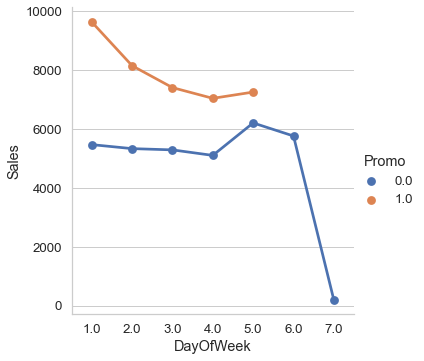

In [86]:
sns.catplot(x='DayOfWeek', y='Sales',
               hue='Promo',
               kind='point',
               data=merged_train_store);

___

## 5. 'Sales' vs 'CompetitionDistance'

### 5.1 'Sales' by 'CompetitionDistance' - jointplot

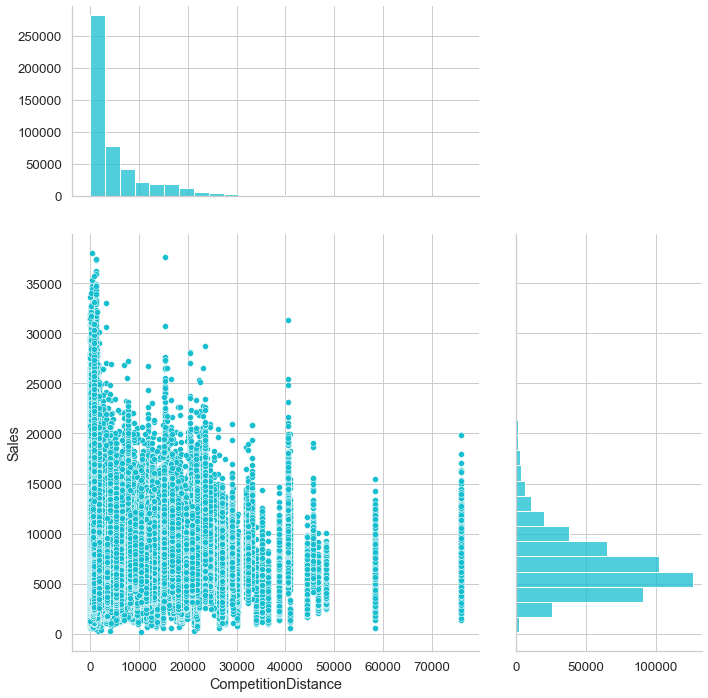

In [87]:
sns.jointplot(x="CompetitionDistance", y="Sales", 
              height=10, 
              ratio=2, 
              marginal_ticks=True,
              color = '#17becf',
              marginal_kws=dict(bins=25, fill=True),
              data=nonzero_merged_Sales);

### 5.2a 'CompetitionDistance' vs 'Sales' in 'Assortment'

We use `replot()`function from seaborn library with the default option `kind='scatter'`,to present the relationship between two numerical features, 'Sales' and 'CompetitionDistance' with a breakdown to two categorical features: 'Assortment' and 'StoreType'.

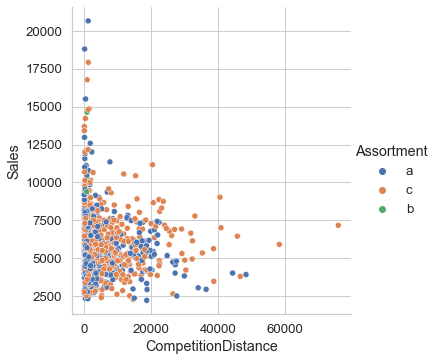

In [88]:
by_store_avg = merged_train_store.groupby(['Store', 'Assortment', 'StoreType'])
avg_sales_store = by_store_avg.agg(np.mean)
avg_sales_store = avg_sales_store.reset_index()

sns.relplot(x='CompetitionDistance', y='Sales',
            hue='Assortment',
            data=avg_sales_store);

### 5.2b 'CompetitionDistance' vs 'Sales' presented on separate charts for better readability

<Figure size 1440x864 with 0 Axes>

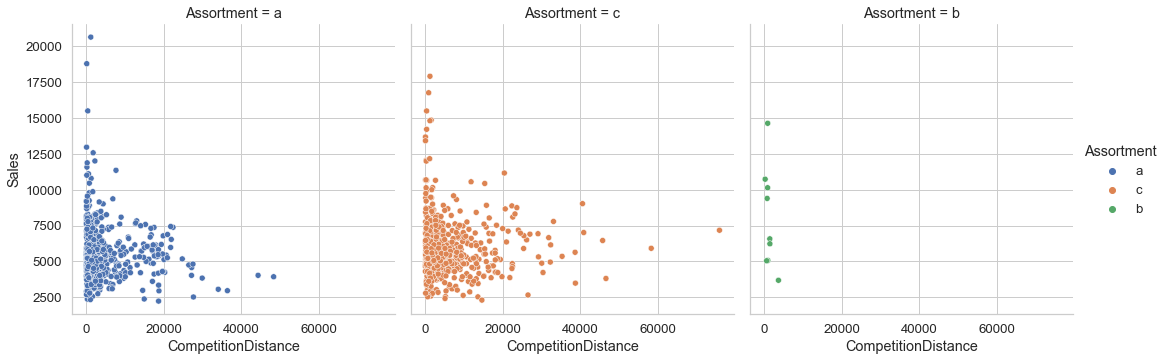

In [89]:
plt.figure(figsize=(20, 12))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='Assortment',
            hue='Assortment',
            data=avg_sales_store);

### 5.3 'CompetitionDistance' vs 'Sales' in 'StoreType'

<Figure size 1440x648 with 0 Axes>

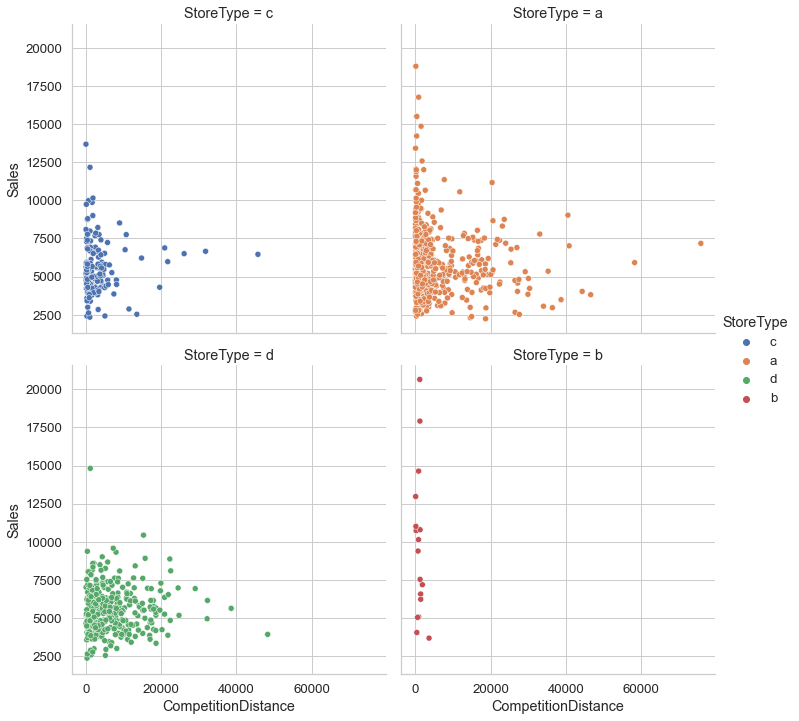

In [90]:
plt.figure(figsize=(20, 9))
sns.relplot(x='CompetitionDistance', y='Sales',
            col='StoreType',
            hue='StoreType',
            col_wrap=2,
            data=avg_sales_store);

## 6. Average 'Sales' over the 'DayOfWeek' with 'StoreType' breakdown

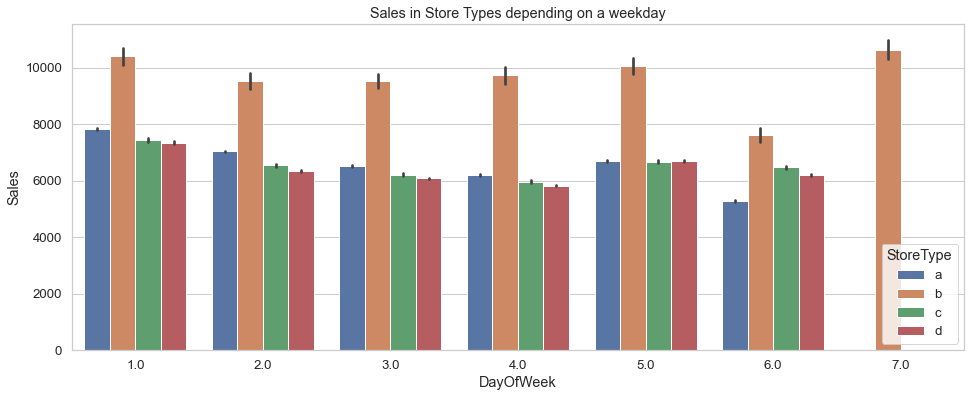

In [91]:
merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType'])

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek', y='Sales', 
            #hue = 'Assortment', 
            hue = 'StoreType',
            data=merged_train_store.sort_values(by = ['DayOfWeek', 'StoreType']))
plt.title("Sales in Store Types depending on a weekday");